In [49]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data=pd.read_csv('mushrooms.csv')

In [110]:
data.shape

(8124, 23)

In [51]:
data.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


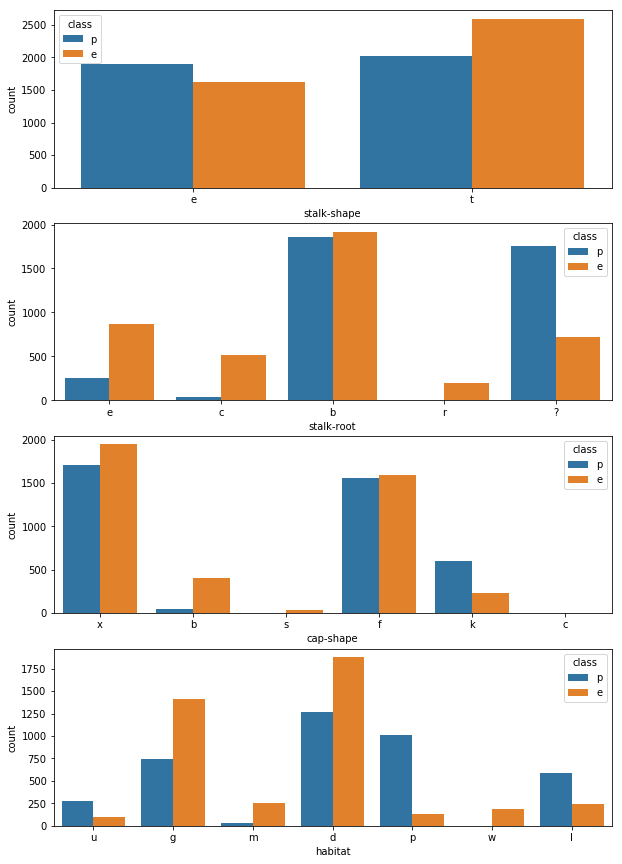

In [53]:
fig, axs = plt.subplots(4,figsize=(10,15))
sns.countplot(data=data,x='stalk-shape',ax=axs[0],hue='class')
sns.countplot(data=data,x='stalk-root',ax=axs[1],hue='class')
sns.countplot(data=data,x='cap-shape',ax=axs[2],hue='class')
sns.countplot(data=data,x='habitat',ax=axs[3],hue='class')


As you can see the mushrooms on p have more chance of being poisnous(Last Bar Plot)


In [54]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [55]:
print(data.shape)

(8124, 23)


Since all the values are strings we can convert into integer using Label Encoder.

In [56]:
print(data.groupby('class').size())

class
e    4208
p    3916
dtype: int64


In [57]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in data.columns:
    data[col]=labelencoder.fit_transform(data[col])

In [59]:
data.groupby('class').size()

class
0    4208
1    3916
dtype: int64

In [62]:
X=data.iloc[:,1:23]
y=data.iloc[:,0]

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [69]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X)

array([[-5.74321902e-01, -9.75781349e-01, -1.22176154e+00, ...,
        -2.08581362e-01,  8.13996758e-03, -4.50716667e-18],
       [-2.28210230e+00,  2.79066333e-01, -1.20049669e+00, ...,
         1.52238789e-01, -1.96446132e-01,  1.23279887e-17],
       [-1.85803562e+00, -2.70972362e-01, -1.37237069e+00, ...,
         2.57581784e-01, -3.62577199e-01,  5.46884410e-18],
       ...,
       [-1.62151632e+00, -7.57536709e-01,  2.73357994e+00, ...,
        -1.42532241e+00,  6.36990122e-01,  1.98576179e-19],
       [ 3.67060561e+00, -1.03277450e+00,  1.68459501e-01, ...,
         9.41440123e-02, -6.43462238e-02, -1.12807637e-20],
       [-1.57520272e+00, -1.22858140e+00,  2.44722789e+00, ...,
        -8.04626064e-01,  5.90315263e-01,  2.10565821e-20]])

In [71]:
pca.get_covariance()

array([[ 1.00012311e+00, -5.04598689e-02, -4.82087723e-02,
        -3.53784857e-02, -2.19379500e-02,  7.88747759e-02,
         1.31976727e-02,  5.40569473e-02, -6.03950664e-03,
         6.38020697e-02,  3.01947722e-02, -3.04209144e-02,
        -3.25951166e-02, -3.16631918e-02, -3.03935589e-02,
         4.49848884e-18,  7.25693997e-02, -1.06546915e-01,
        -2.54597238e-02, -7.34245762e-02,  6.34209571e-02,
        -4.22261061e-02],
       [-5.04598689e-02,  1.00012311e+00, -1.94041011e-02,
         7.02370673e-02,  4.52388718e-02, -3.41840973e-02,
        -2.82340541e-01,  2.08125459e-01, -1.61037318e-01,
        -1.41243642e-02, -1.26260048e-01,  8.91013054e-02,
         1.07977800e-01,  6.60584116e-02,  6.88933788e-02,
        -8.36594750e-18, -1.66054596e-02, -2.61503505e-02,
        -1.06420046e-01,  2.30392413e-01,  2.15577812e-02,
         1.63906824e-01],
       [-4.82087723e-02, -1.94041011e-02,  1.00012311e+00,
        -7.64543349e-04, -3.87168603e-01,  4.14406892e-02,
    

In [77]:
pca.explained_variance_

array([3.87410924e+00, 2.60339434e+00, 2.40073834e+00, 2.16674719e+00,
       1.70303181e+00, 1.39495575e+00, 9.78803667e-01, 9.51936841e-01,
       7.70036405e-01, 7.11748353e-01, 5.77556532e-01, 5.42484855e-01,
       5.09631267e-01, 4.77214086e-01, 3.84467203e-01, 3.11228233e-01,
       2.18649656e-01, 1.59514884e-01, 1.31521687e-01, 7.31993474e-02,
       6.16155691e-02, 6.33600236e-35])

In [85]:
(pca.explained_variance_[0:13]/pca.explained_variance_.sum()).sum()

# As you can see the the 1st 13 components explain 90% of variance

0.9134672877887388

In [93]:
pca=PCA(n_components=12)
pca.fit_transform(X)

array([[-0.5743219 , -0.97578135, -1.22176154, ...,  0.4059626 ,
        -0.69059792,  0.82162721],
       [-2.2821023 ,  0.27906633, -1.20049669, ..., -0.1585238 ,
         0.19434593, -1.38783028],
       [-1.85803562, -0.27097236, -1.37237069, ...,  0.33931742,
        -0.29356577, -0.51111309],
       ...,
       [-1.62151632, -0.75753671,  2.73357994, ..., -0.18716107,
        -0.26470829, -0.6590295 ],
       [ 3.67060561, -1.0327745 ,  0.1684595 , ..., -0.15867691,
        -1.40452466,  0.23880758],
       [-1.57520272, -1.2285814 ,  2.44722789, ..., -0.1912903 ,
        -0.02900151, -0.06581524]])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

In [102]:
model_LR.fit(X_train,y_train)

C:\Users\priya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
y_pred=model_LR.predict(X_test)

In [105]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1209,   56],
       [  43, 1130]], dtype=int64)

In [111]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9595365418894831